<a href="https://colab.research.google.com/github/Fernandaedu/ProyectoText/blob/main/ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import spacy
import numpy as np
import re
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pkg_resources, imp
imp.reload(pkg_resources)

<module 'pkg_resources' from '/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py'>

# PROYECTO FINAL
# Andrea Celeste González Torres Carnet 22007687
# María Fernanda Morales Álvarez Carnet 22007685

## Problema 1 - Word Cloud

In [ ]:
from googl
e.colab import files

files.upload()

Saving tw_source.csv to tw_source.csv


In [ ]:
URL = 'tw_source.csv'
tweets_DF = pd.read_csv(URL, encoding='latin-1', usecols=[1, 2, 5], names=['Id','Timestamp', 'Length'])
tweets_DF.head()

,Id,Timestamp,Length
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all...."


Los 3 usuarios mas populares

In [ ]:
tweets_DF['Mentions'] = tweets_DF['Length'].apply(lambda x: re.findall(r'@\w+', x))

mentions = tweets_DF.explode('Mentions')

top_3_mentions = mentions['Mentions'].value_counts().head(3)

print('Los 3 usuarios más populares son:\n')
print(top_3_mentions)

Los 3 usuarios más populares son:

@mileycyrus    4500
@tommcfly      3887
@ddlovato      3467
Name: Mentions, dtype: int64


Corpus

In [ ]:
top_3_list = []

# Tres usuarios más populares
for user_mention in top_3_mentions.index:
    # Filtramos los tweets relacionados con el usuario mencionado
    user_data = tweets_DF[tweets_DF['Length'].str.contains(user_mention)]

    # Seleccionamos las columnas deseadas
    user_data = user_data[['Length', 'Id', 'Timestamp']]

    # Calculamos la longitud del tweet sin la mención
    user_data['Tweet_Length'] = user_data['Length'].str.len() - len(user_mention) - 1

    # Agregamos los datos a la lista
    top_3_list.append(user_data)


In [ ]:
top_user1 = pd.DataFrame(top_3_list[0])
top_user1.head()

,Length,Id,Timestamp,Tweet_Length
1021,@mileycyrus hahaha dont be like that one time ...,1468063101,Mon Apr 06 23:30:57 PDT 2009,95
2014,"@mileycyrus i have the same problem, but it's ...",1468286517,Tue Apr 07 00:45:20 PDT 2009,125
2073,@mileycyrus I guess counting sheep didn't work...,1468297110,Tue Apr 07 00:49:07 PDT 2009,60
2080,@mileycyrus I would too if it meant spending a...,1468298918,Tue Apr 07 00:49:44 PDT 2009,88
2156,@mileycyrus AWWW u seriously have the cutest d...,1468318249,Tue Apr 07 00:56:41 PDT 2009,100


In [ ]:
top_user2 = pd.DataFrame(top_3_list[1])
top_user2.head()


,Length,Id,Timestamp,Tweet_Length
1690,@tommcfly hey saw u guys play @ pushover..didn...,1468210813,Tue Apr 07 00:19:09 PDT 2009,128
1789,@tommcfly Good morning Tom! Why can't I send y...,1468233211,Tue Apr 07 00:26:52 PDT 2009,121
2514,@tommcfly did you know that johnsons baby use ...,1468391638,Tue Apr 07 01:23:07 PDT 2009,86
3029,"@dougiemcfly @tommcfly good morning guys, how ...",1468502040,Tue Apr 07 02:03:41 PDT 2009,98
3524,"@tommcfly hey, no chance of adding brighton or...",1468618787,Tue Apr 07 02:46:02 PDT 2009,121


In [ ]:
top_user3 = pd.DataFrame(top_3_list[2])
top_user3.head()

,Length,Id,Timestamp,Tweet_Length
460,@ddlovato @David_Henrie ummmmm i cant find it.,1467929230,Mon Apr 06 22:51:34 PDT 2009,37
573,@ddlovato Do you hate us?? Please don't,1467953367,Mon Apr 06 22:58:30 PDT 2009,30
7032,@ddlovato Wish that i could see it.. Thats th...,1469661950,Tue Apr 07 07:02:58 PDT 2009,86
7089,"@ddlovato hey demi, wen are you and selena gon...",1469674492,Tue Apr 07 07:05:11 PDT 2009,69
8611,@ddlovato ahhhh i wish i could go to the dalla...,1548280868,Fri Apr 17 20:31:31 PDT 2009,75


# Remover Stopwords

In [ ]:
nlp_en = spacy.load("en_core_web_sm")

def removeStops(corpus):
    newCorpus = []
    try:
        for doc in corpus:
            #lista para eliminar las stop words
            tokens_without_stops = [token.text for token in doc if not token.is_stop]
            s = " ".join(tokens_without_stops)
            newCorpus.append(s)
        return newCorpus
    except Exception as e:
        print(f"Error en removeStops: {e}")
        return []



In [ ]:
corpus1 = removeStops(corpus1)

In [ ]:
corpus2 = removeStops(corpus2)

In [ ]:
corpus3 = removeStops(corpus3)

# Stemming y Lemmatization

In [ ]:
def stemmingLemmating(corpus):
  documents = tokenizacion(corpus)
  newCorpus = []
  for doc in documents:
    s = ""
    for token in doc:
      s = s + token.lemma_ + " "
    newCorpus.append(s.strip())
  return newCorpus


In [ ]:
corpus1 = stemmingLemmating(corpus1)

In [ ]:
corpus2 = stemmingLemmating(corpus2)

In [ ]:
corpus3 = stemmingLemmating(corpus3)

# Palabras más representativas

In [ ]:
def listToString(s):
    strX = ""
    for palabra in s:
        strX = strX + palabra + " "
    return strX

In [ ]:
def rep_words(strCorpus, k):
  #strCorpus = listToString(corpus).split()
  most_common = pd.DataFrame(Counter(strCorpus.split()).most_common(k), columns=['Word', 'Count'])
  return most_common

In [ ]:
k = 11

In [ ]:
strCorpus1 = listToString(corpus1)

print('Palabras mas utilizadas para ' + str(top_3_mentions.iloc[0]) + '\n')

rep_words(strCorpus1, k)

Palabras mas utilizadas para 4500



,Word,Count
0,love,912
1,miley,838
2,not,710
3,u,647
4,m,590
5,good,506
6,vote,428
7,come,327
8,s,297
9,hope,288


In [ ]:
strCorpus2 = listToString(corpus2)

print('Palabras mas utilizadas para ' + str(top_3_mentions.iloc[0]) + '\n')
rep_words(strCorpus2, k)

Palabras mas utilizadas para 4500



,Word,Count
0,tom,688
1,not,666
2,love,465
3,m,462
4,come,372
5,good,353
6,u,344
7,xx,304
8,guy,287
9,x,271


In [ ]:
strCorpus3 = listToString(corpus3)

print('Palabras mas utilizadas para ' + str(top_3_mentions.iloc[0]) + '\n')
rep_words(strCorpus3, k)

Palabras mas utilizadas para 4500



,Word,Count
0,love,630
1,not,628
2,demi,580
3,m,530
4,u,446
5,come,367
6,s,290
7,good,257
8,wish,256
9,hope,245


# Wordcloud

In [ ]:
def generate_word_cloud(strCorpus, username, k=100):
    try:
        stopwords = set(STOPWORDS)

        wordcloud = WordCloud(width=800, height=800,
                              background_color='white',
                              stopwords=stopwords,
                              max_words=k,
                              min_font_size=10).generate(strCorpus)

        # Configuración del aspecto de la nube de palabras
        plt.figure(figsize=(8, 8), facecolor=None)
        plt.imshow(wordcloud)
        plt.title(f'WORDCLOUD DE {username}\n', fontdict={"fontsize": 20, "color": "red", "fontweight": "bold"})
        plt.axis("off")
        plt.tight_layout(pad=0)

        plt.show()
    except Exception as e:
        print(f"Error al generar la nube de palabras: {e}")


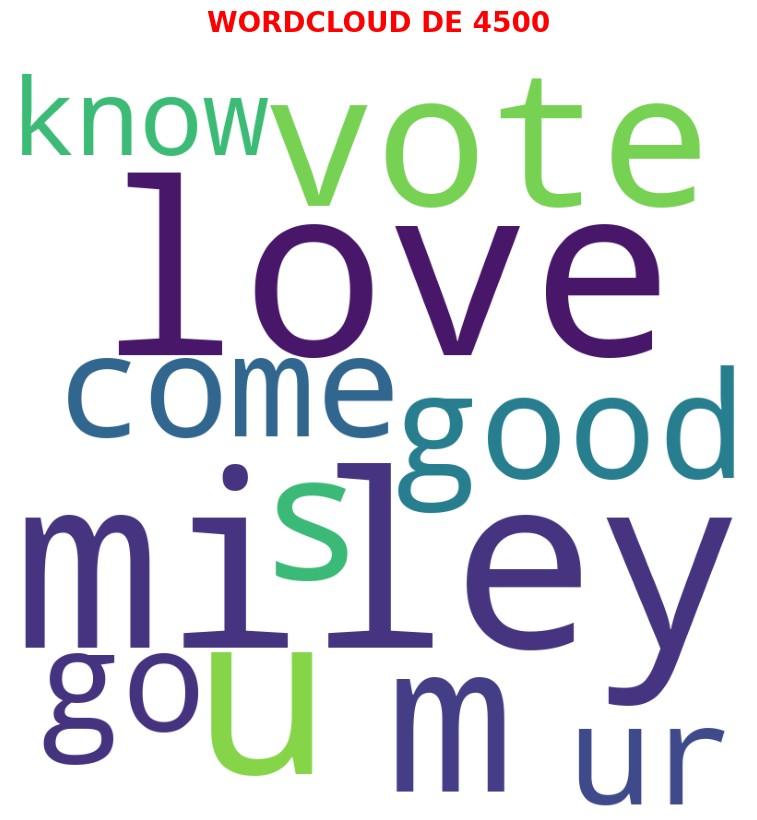

In [ ]:
generate_word_cloud(strCorpus1, str(top_3_mentions.iloc[0]), k)

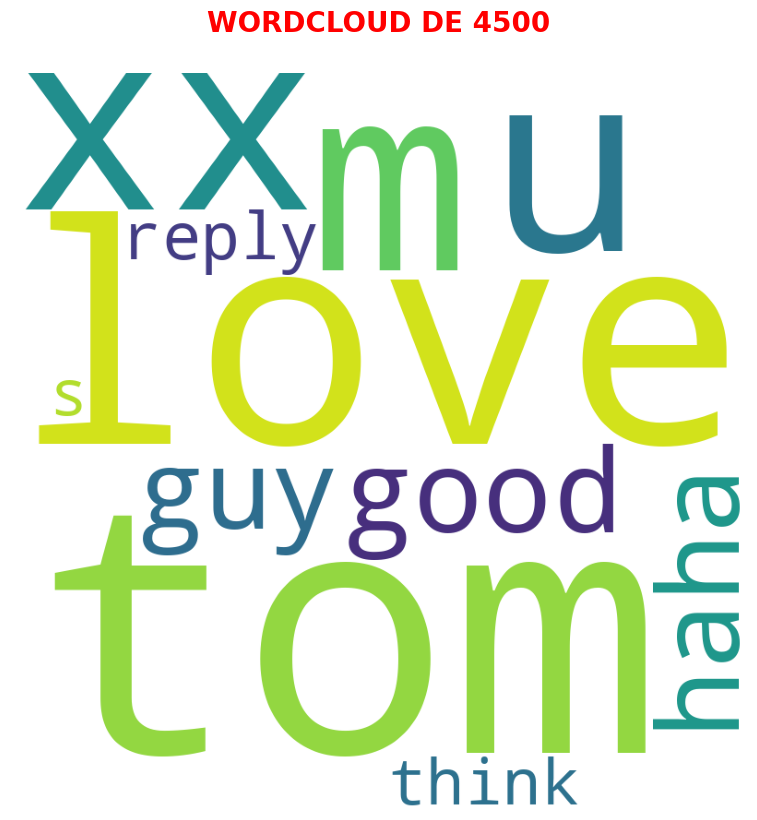

In [ ]:
generate_word_cloud(strCorpus2, str(top_3_mentions.iloc[0]), k)

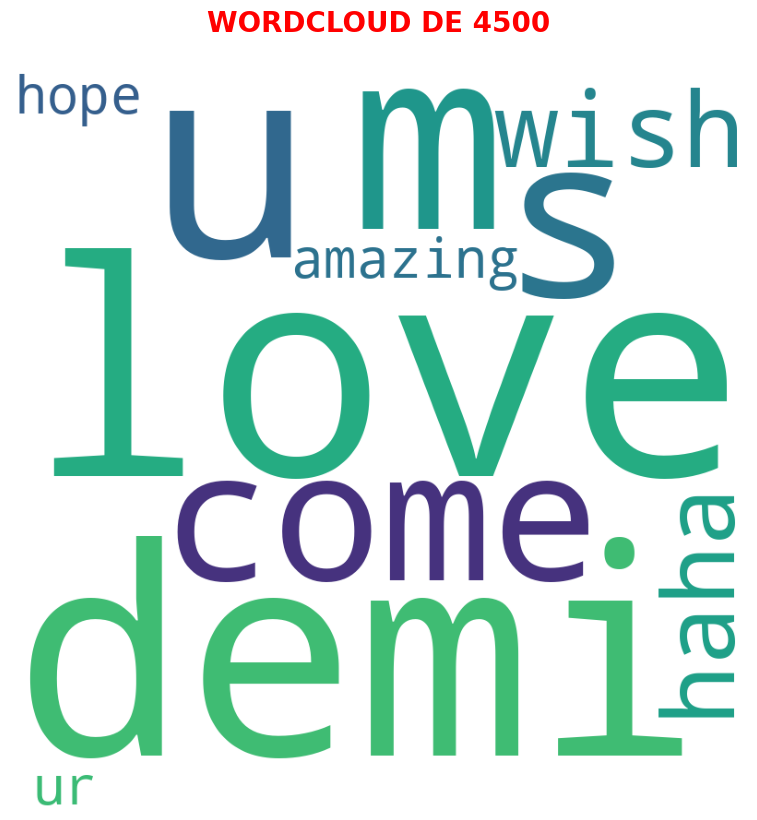

In [ ]:
generate_word_cloud(strCorpus3, str(top_3_mentions.iloc[0]), k)

## Problema 2 - Digist Recognizer

In [ ]:
from google.colab import files

files.upload()

Saving train.csv to train (1).csv


In [ ]:
URL = 'train.csv'
train = pd.read_csv(URL, encoding='latin-1')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
## Eliminaremos la columna label
label = train['label']
train_df = train.drop(columns=['label'])
train_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Reshape de los datos de entrada

In [ ]:
train_reshape=train_df.values.reshape(-1, 28, 28)
print(train_reshape.shape)

(42000, 28, 28)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_reshape, label, test_size=0.3, random_state=42)

In [ ]:
# Normalizacion de los datos
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 28, 28))

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

Creación de Red Neuronal Artificial (ANN)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

modelo = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelo.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Entrenamos el modelo
modelo.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
919/919 [==============================] - 8s 8ms/step - loss: 0.2670 - accuracy: 0.9231 - val_loss: 0.1661 - val_accuracy: 0.9511
Epoch 2/10
919/919 [==============================] - 6s 7ms/step - loss: 0.1653 - accuracy: 0.9520 - val_loss: 0.1436 - val_accuracy: 0.9565
Epoch 3/10
919/919 [==============================] - 7s 8ms/step - loss: 0.1302 - accuracy: 0.9595 - val_loss: 0.1245 - val_accuracy: 0.9633
Epoch 4/10
919/919 [==============================] - 6s 6ms/step - loss: 0.1059 - accuracy: 0.9671 - val_loss: 0.1143 - val_accuracy: 0.9675
Epoch 5/10
919/919 [==============================] - 6s 6ms/step - loss: 0.0905 - accuracy: 0.9706 - val_loss: 0.1095 - val_accuracy: 0.9687
Epoch 6/10
919/919 [==============================] - 6s 7ms/step - loss: 0.0760 - accuracy: 0.9763 - val_loss: 0.1048 - val_accuracy: 0.9694
Epoch 7/10
919/919 [==============================] - 6s 6ms/step - loss: 0.0707 - accuracy: 0.9777 - val_loss: 0.1000 - val_accuracy: 0.9705
Epoch 

Evaluación del rendimiento del modelo utilizando el conjunto de prueba

In [ ]:
test_loss, test_acc = modelo.evaluate(X_test, y_test, verbose=2)
print(f'\nExactitud en el conjunto de prueba: {test_acc*100:.2f}%')

394/394 - 1s - loss: 0.1000 - accuracy: 0.9725 - 770ms/epoch - 2ms/step

Exactitud en el conjunto de prueba: 97.25%


Métricas de evaluación

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_prob = modelo.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precisión: {accuracy}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

394/394 [==============================] - 2s 5ms/step
Precisión: 0.9725396825396826
Recall: 0.9725396825396826
F1-Score: 0.9725244680234404


Implementación de la Red Neuronal Convolucional (CNN)

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
modelo1 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
modelo1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelo1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 5408)              0         
                                                                 
 dense_24 (Dense)            (None, 128)               692352    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 10)                1290      
                                                     

In [ ]:
## Entrenar el modelo
modelo1.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
919/919 [==============================] - 35s 36ms/step - loss: 1.4295 - accuracy: 0.5415 - val_loss: 0.6160 - val_accuracy: 0.8406
Epoch 2/10
919/919 [==============================] - 25s 27ms/step - loss: 0.6569 - accuracy: 0.7981 - val_loss: 0.4079 - val_accuracy: 0.8844
Epoch 3/10
919/919 [==============================] - 25s 27ms/step - loss: 0.5253 - accuracy: 0.8397 - val_loss: 0.3438 - val_accuracy: 0.8978
Epoch 4/10
919/919 [==============================] - 25s 28ms/step - loss: 0.4661 - accuracy: 0.8591 - val_loss: 0.3095 - val_accuracy: 0.9076
Epoch 5/10
919/919 [==============================] - 27s 29ms/step - loss: 0.4271 - accuracy: 0.8698 - val_loss: 0.2825 - val_accuracy: 0.9159
Epoch 6/10
919/919 [==============================] - 24s 27ms/step - loss: 0.4029 - accuracy: 0.8786 - val_loss: 0.2578 - val_accuracy: 0.9222
Epoch 7/10
919/919 [==============================] - 26s 28ms/step - loss: 0.3814 - accuracy: 0.8852 - val_loss: 0.2469 - val_accuracy:

Evaluación del rendimiento del modelo utilizando el conjunto de prueba

In [ ]:
results = modelo1.evaluate(X_test, y_test, verbose=0)
print(f'Loss: {results[0]}')
print(f'Accuracy: {results[1]}')


Loss: 0.2125118374824524
Accuracy: 0.9357936382293701


Métricas de evaluación

In [ ]:
y_pred_prob = modelo1.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precisión: {accuracy}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

394/394 [==============================] - 3s 8ms/step
Precisión: 0.9357936507936508
Recall: 0.9357936507936508
F1-Score: 0.9357127611665016


Comparación y Conclusiones

In [ ]:
# Metricas Red Neuronal Artificial (ANN)
test_loss, test_acc

(0.09998439997434616, 0.9725396633148193)

In [ ]:
# Metricas Red Neuronal Convencional (CNN)
cnn_resultados = modelo1.evaluate(X_test, y_test, verbose=0)
cnn_loss, cnn_accuracy = cnn_resultados


In [ ]:
print(f'ANN - Loss en el conjunto de prueba: {test_loss}, Accuracy: {test_acc}')
print(f'CNN - Loss en el conjunto de prueba: {cnn_loss}, Accuracy: {cnn_accuracy}')

ANN - Loss en el conjunto de prueba: 0.09998439997434616, Accuracy: 0.9725396633148193
CNN - Loss en el conjunto de prueba: 0.2125118374824524, Accuracy: 0.9357936382293701


Realizando la comparación de los resultados obtenidos de los modelos de Red Neuronal Artificial (ANN) y Red Neuronal Artificial (CNN) vemos que ANN tiene un mejor rendimiento en precisión y pérdida en el conjunto de prueba y por lo tanto el modelo de ANN funcionó mejor que el modelo CNN.
